In [508]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.integrate import quad
import scipy.fft as fourier
import time
from scipy.signal import butter, filtfilt, freqz

1 задание

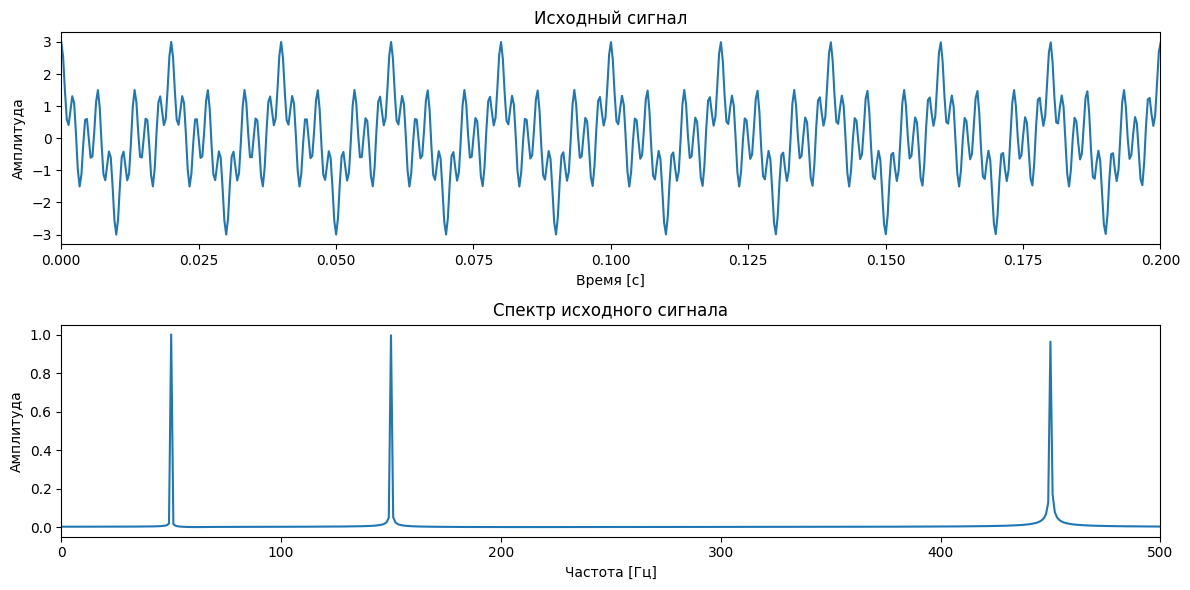

In [509]:
# Зададим параметры
fs = 3000  # Частота дискретизации
t = np.linspace(0, 1, fs)  # Временной вектор

# Сигнал с частотами 50 Гц, 150 Гц и 450 Гц
signal = np.cos(2*np.pi*50*t) + np.cos(2*np.pi*150*t) + np.cos(2*np.pi*450*t)

# Выполним БПФ (быстрое преобразование Фурье)
signal_fft = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(t), 1/fs)

# Построим графики исходного сигнала и его спектра
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.xlim(0, 0.2)
plt.title('Исходный сигнал')
plt.xlabel('Время [с]')
plt.ylabel('Амплитуда')

plt.subplot(2, 1, 2)
plt.plot(frequencies[:len(frequencies)//2], np.abs(signal_fft)[:len(frequencies)//2] * 2 / fs)
plt.xlim(0, 500)
plt.title('Спектр исходного сигнала')
plt.xlabel('Частота [Гц]')
plt.ylabel('Амплитуда')

plt.tight_layout()
plt.show()

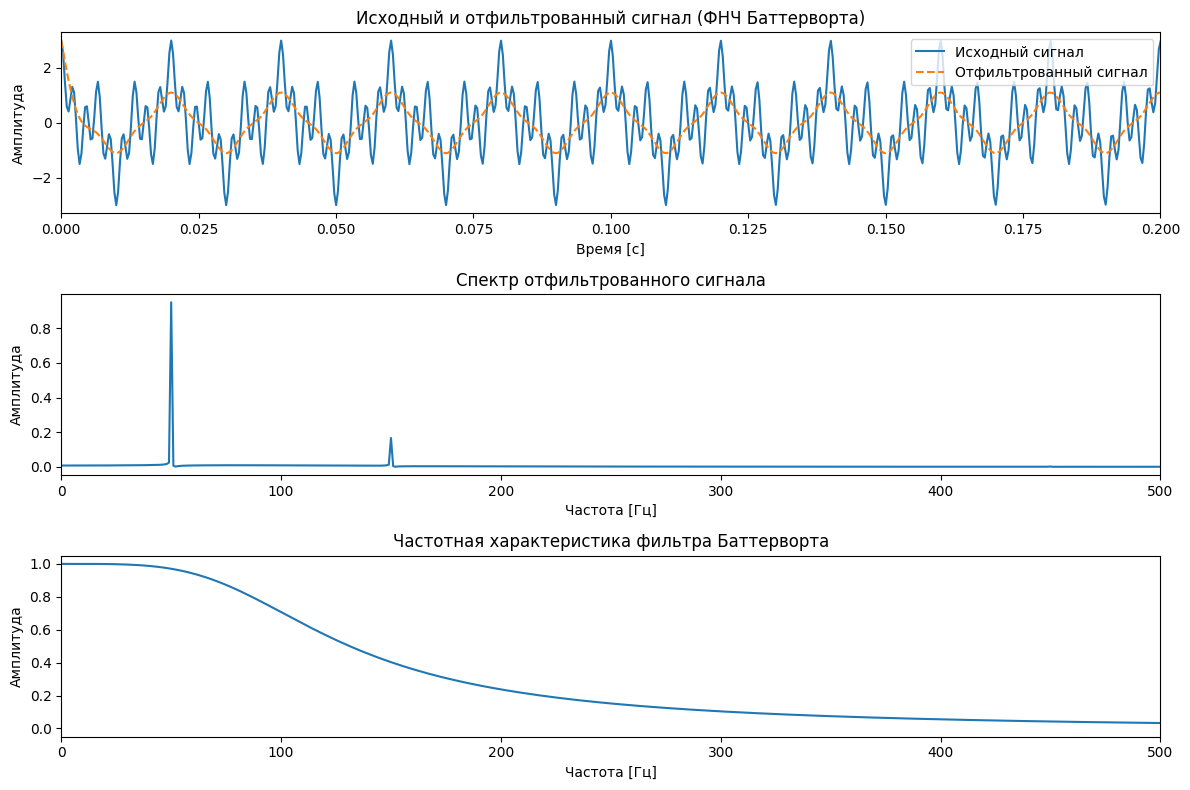

In [510]:
# Реализуем фильтр Баттерворта нижних частот 2-го порядка
cutoff_freq = 100  # Частота среза в Гц
order = 2  # Порядок фильтра
nyquist = 0.5 * fs  # Частота Найквиста
normal_cutoff = cutoff_freq / nyquist

# Получаем коэффициенты фильтра
b, a = butter(order, normal_cutoff)

# Применяем фильтр к сигналу
filtered_signal = filtfilt(b, a, signal)

# Частотная характеристика фильтра
w, h = freqz(b, a, fs=fs)

# Построим графики фильтра и отфильтрованного сигнала
plt.figure(figsize=(12, 8))

# График исходного и отфильтрованного сигнала
plt.subplot(3, 1, 1)
plt.plot(t, signal, label='Исходный сигнал')
plt.plot(t, filtered_signal, label='Отфильтрованный сигнал', linestyle='--')
plt.xlim(0, 0.2)
plt.title('Исходный и отфильтрованный сигнал (ФНЧ Баттерворта)')
plt.xlabel('Время [с]')
plt.ylabel('Амплитуда')
plt.legend()

# Спектр отфильтрованного сигнала
filtered_signal_fft = np.fft.fft(filtered_signal)
plt.subplot(3, 1, 2)
plt.plot(frequencies[:len(frequencies)//2], np.abs(filtered_signal_fft)[:len(frequencies)//2] * 2 / fs)
plt.xlim(0, 500)
plt.title('Спектр отфильтрованного сигнала')
plt.xlabel('Частота [Гц]')
plt.ylabel('Амплитуда')

# Частотная характеристика фильтра Баттерворта
plt.subplot(3, 1, 3)
plt.plot(w, np.abs(h))
plt.xlim(0, 500)
plt.title('Частотная характеристика фильтра Баттерворта')
plt.xlabel('Частота [Гц]')
plt.ylabel('Амплитуда')

plt.tight_layout()
plt.show()


2 задание

c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1.4142135623730951


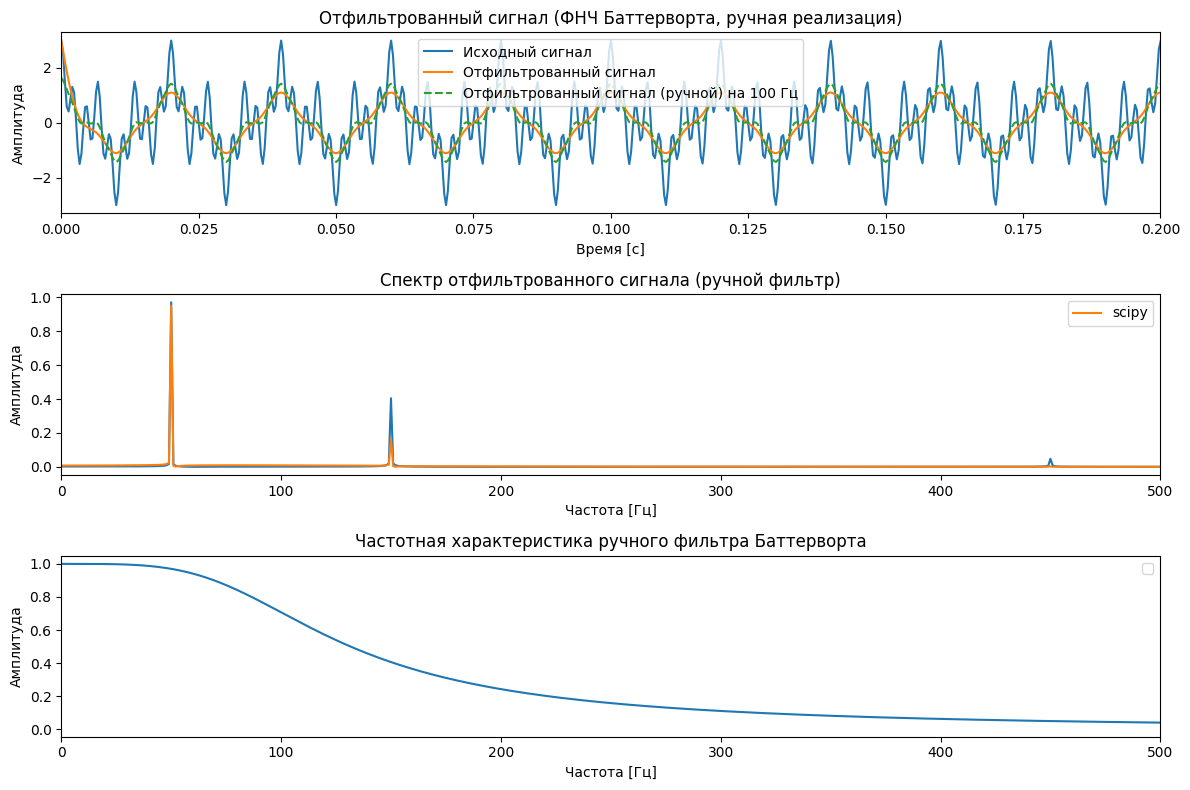

In [511]:
def butterworth_filter_manual(signal, freq, cutoff_freq, order):
    # Нормируем частоты
    fft_signal = np.fft.fft(signal)
    norm_freqs = freq / cutoff_freq
    # Применяем формулу для фильтра Баттерворта
    #H_f = 1 / (1 + norm_freqs**(2*order))
    H_f = 1.0 / (1.0 + norm_freqs*np.sqrt(2)*1j - norm_freqs**2)
    #H_f = (cutoff_freq ** 2) / (-(frequencies**2) + np.sqrt(2)*frequencies*cutoff_freq*1j + 1)
    return np.fft.ifft(np.abs(H_f) * fft_signal), H_f

# Применим фильтр к спектру сигнала
cutoff_freq = 100  # Частота среза в Гц
order = 2  # Порядок фильтра
print(np.sqrt(2))
# Применяем ручной фильтр к спектру
 
filtered_signal_manual, H_f = butterworth_filter_manual(signal, frequencies, cutoff_freq, order)


# Построим графики фильтра и отфильтрованного сигнала
plt.figure(figsize=(12, 8))

# График отфильтрованного сигнала
plt.subplot(3, 1, 1)
plt.plot(t, signal, label='Исходный сигнал')
plt.plot(t, filtered_signal, label='Отфильтрованный сигнал', linestyle='-')
plt.plot(t, filtered_signal_manual, label=f'Отфильтрованный сигнал (ручной) на {cutoff_freq} Гц', linestyle='--')
plt.xlim(0, 0.2)
plt.title('Отфильтрованный сигнал (ФНЧ Баттерворта, ручная реализация)')
plt.xlabel('Время [с]')
plt.ylabel('Амплитуда')
plt.legend()

# Спектр отфильтрованного сигнала
plt.subplot(3, 1, 2)
plt.plot(frequencies[:len(frequencies)//2], np.abs(np.fft.fft(filtered_signal_manual))[:len(frequencies)//2] * 2 / fs)
plt.plot(frequencies[:len(frequencies)//2], np.abs(filtered_signal_fft)[:len(frequencies)//2] * 2 / fs, label="scipy")
plt.xlim(0, 500)
plt.title('Спектр отфильтрованного сигнала (ручной фильтр)')
plt.xlabel('Частота [Гц]')
plt.ylabel('Амплитуда')
plt.legend()

# Частотная характеристика фильтра Баттерворта
plt.subplot(3, 1, 3)
# plt.plot(frequencies[:len(frequencies)//2], H_f[:len(frequencies)//2])
plt.plot(np.abs(H_f))
#plt.plot(w, np.abs(h), label='scipy')
plt.xlim(0, 500)
plt.title('Частотная характеристика ручного фильтра Баттерворта')
plt.xlabel('Частота [Гц]')
plt.ylabel('Амплитуда')
plt.legend()
plt.tight_layout()
plt.show()

3 задание

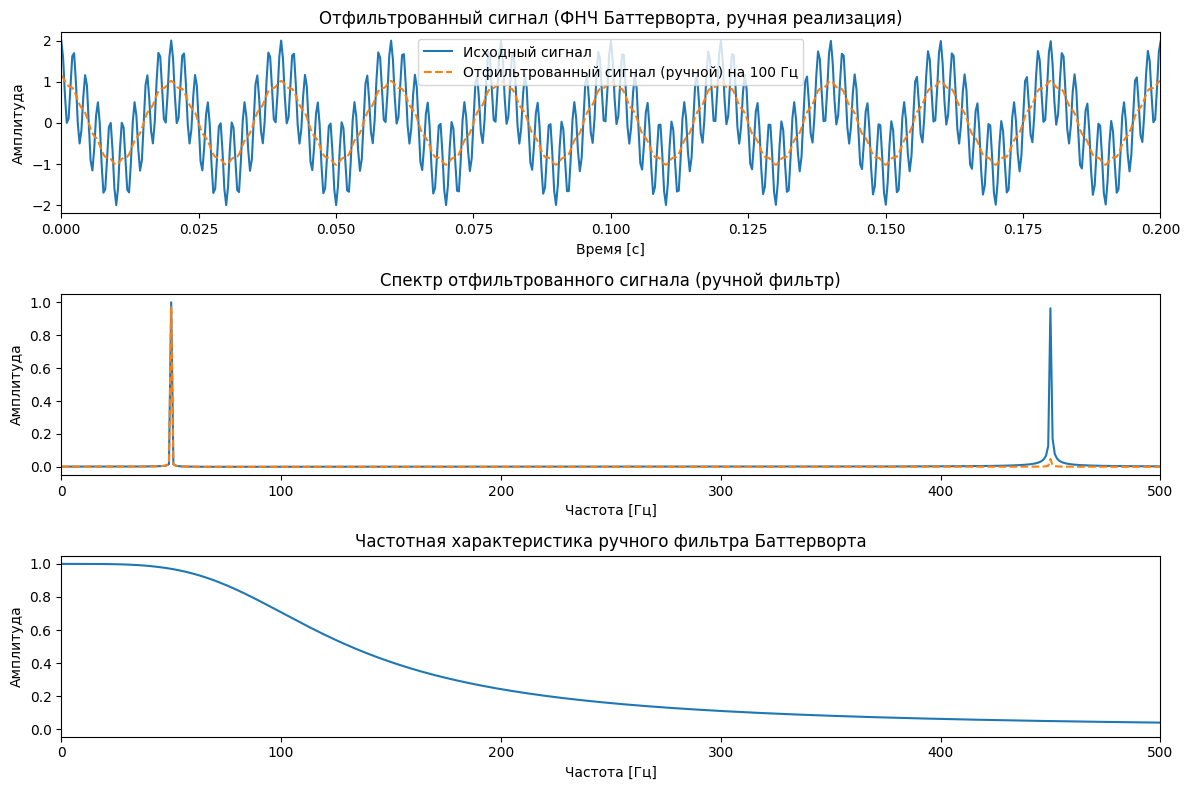

In [512]:
# Применим на двух частотах - 50 и 450
cutoff_freq = 100
signal2 = np.cos(2*np.pi*50*t) + np.cos(2*np.pi*450*t)
filtered_signal_manual, H_f = butterworth_filter_manual(signal2, frequencies, cutoff_freq, order)


# Построим графики фильтра и отфильтрованного сигнала
plt.figure(figsize=(12, 8))

# График отфильтрованного сигнала
plt.subplot(3, 1, 1)
plt.plot(t, signal2, label='Исходный сигнал')
#plt.plot(t, filtered_signal, label='Отфильтрованный сигнал', linestyle='-')
plt.plot(t, filtered_signal_manual.real, label=f'Отфильтрованный сигнал (ручной) на {cutoff_freq} Гц', linestyle='--')
plt.xlim(0, 0.2)
plt.title('Отфильтрованный сигнал (ФНЧ Баттерворта, ручная реализация)')
plt.xlabel('Время [с]')
plt.ylabel('Амплитуда')
plt.legend()

# Спектр отфильтрованного сигнала
plt.subplot(3, 1, 2)
plt.plot(frequencies[:len(frequencies)//2], np.abs(np.fft.fft(signal2))[:len(frequencies)//2] * 2 / fs, label='Спектр')
plt.plot(frequencies[:len(frequencies)//2], np.abs(np.fft.fft(filtered_signal_manual))[:len(frequencies)//2] * 2 / fs, label='Спектр после фильтра', linestyle='--')
plt.xlim(0, 500)
plt.title('Спектр отфильтрованного сигнала (ручной фильтр)')
plt.xlabel('Частота [Гц]')
plt.ylabel('Амплитуда')

# Частотная характеристика фильтра Баттерворта
plt.subplot(3, 1, 3)
plt.plot(frequencies[:len(frequencies)//2], np.abs(H_f[:len(frequencies)//2]))
plt.xlim(0, 500)
plt.title('Частотная характеристика ручного фильтра Баттерворта')
plt.xlabel('Частота [Гц]')
plt.ylabel('Амплитуда')

plt.tight_layout()
plt.show()

4 задание

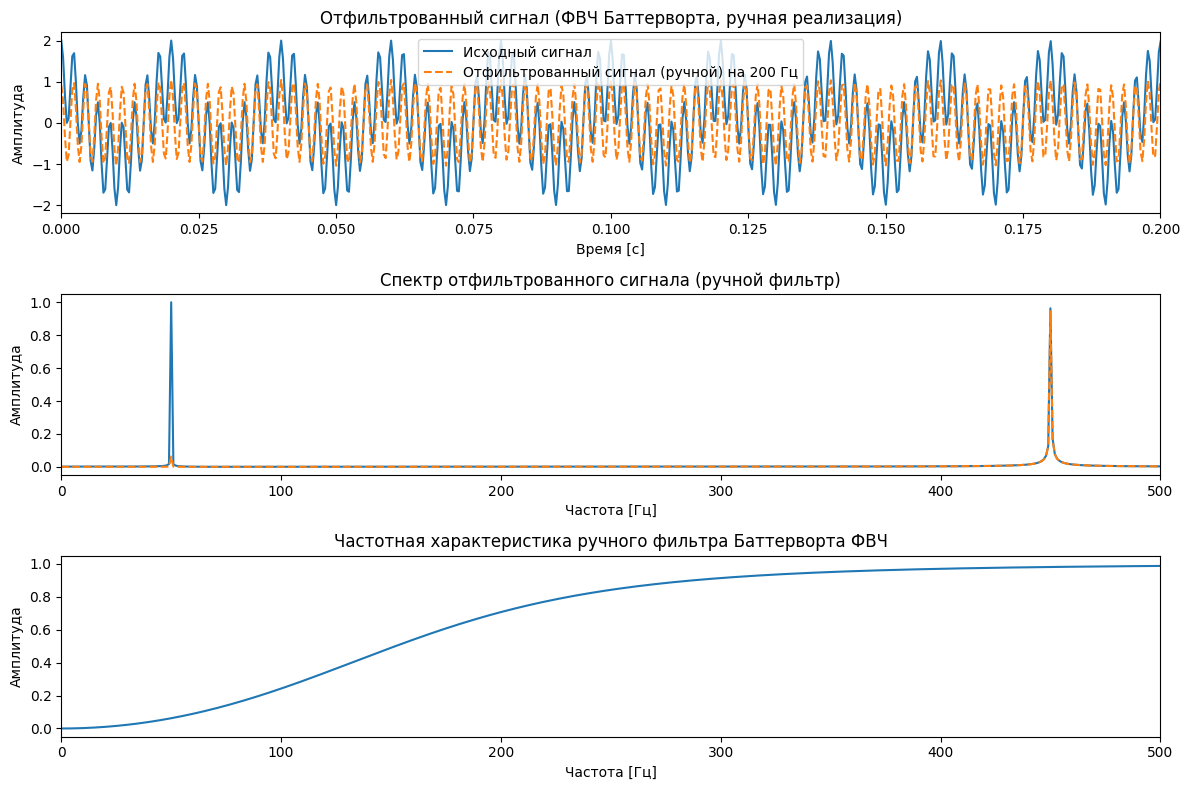

In [513]:
def butterworth_filter_manual_high_freq(signal, freq, cutoff_freq, order):
    # Нормируем частоты
    fft_signal = np.fft.fft(signal)
    norm_freqs = cutoff_freq / (freq+1e-12)
    # Применяем формулу для фильтра Баттерворта
    #H_f = 1 / (1 + norm_freqs**(2*order))
    H_f = 1.0 / (1.0 + norm_freqs*np.sqrt(2)*1j - norm_freqs**2)
    #H_f = (cutoff_freq ** 2) / (-(frequencies**2) + np.sqrt(2)*frequencies*cutoff_freq*1j + 1)
    return np.fft.ifft(np.abs(H_f) * fft_signal), H_f

cutoff_freq = 200
signal2 = np.cos(2*np.pi*50*t) + np.cos(2*np.pi*450*t)
filtered_signal_manual_high, H_f = butterworth_filter_manual_high_freq(signal2, frequencies, cutoff_freq, order)


# Построим графики фильтра и отфильтрованного сигнала
plt.figure(figsize=(12, 8))

# График отфильтрованного сигнала
plt.subplot(3, 1, 1)
plt.plot(t, signal2, label='Исходный сигнал')
#plt.plot(t, filtered_signal, label='Отфильтрованный сигнал', linestyle='-')
plt.plot(t, filtered_signal_manual_high.real, label=f'Отфильтрованный сигнал (ручной) на {cutoff_freq} Гц', linestyle='--')
plt.xlim(0, 0.2)
plt.title('Отфильтрованный сигнал (ФВЧ Баттерворта, ручная реализация)')
plt.xlabel('Время [с]')
plt.ylabel('Амплитуда')
plt.legend()

# Спектр отфильтрованного сигнала
plt.subplot(3, 1, 2)
plt.plot(frequencies[:len(frequencies)//2], np.abs(np.fft.fft(signal2))[:len(frequencies)//2] * 2 / fs, label='Спектр')
plt.plot(frequencies[:len(frequencies)//2], np.abs(np.fft.fft(filtered_signal_manual_high))[:len(frequencies)//2] * 2 / fs, label='Спектр после фильтра', linestyle='--')
plt.xlim(0, 500)
plt.title('Спектр отфильтрованного сигнала (ручной фильтр)')
plt.xlabel('Частота [Гц]')
plt.ylabel('Амплитуда')

# Частотная характеристика фильтра Баттерворта
plt.subplot(3, 1, 3)
plt.plot(frequencies[:len(frequencies)//2], np.abs(H_f[:len(frequencies)//2]))
plt.xlim(0, 500)
plt.title('Частотная характеристика ручного фильтра Баттерворта ФВЧ')
plt.xlabel('Частота [Гц]')
plt.ylabel('Амплитуда')

plt.tight_layout()
plt.show()

5.1 задание

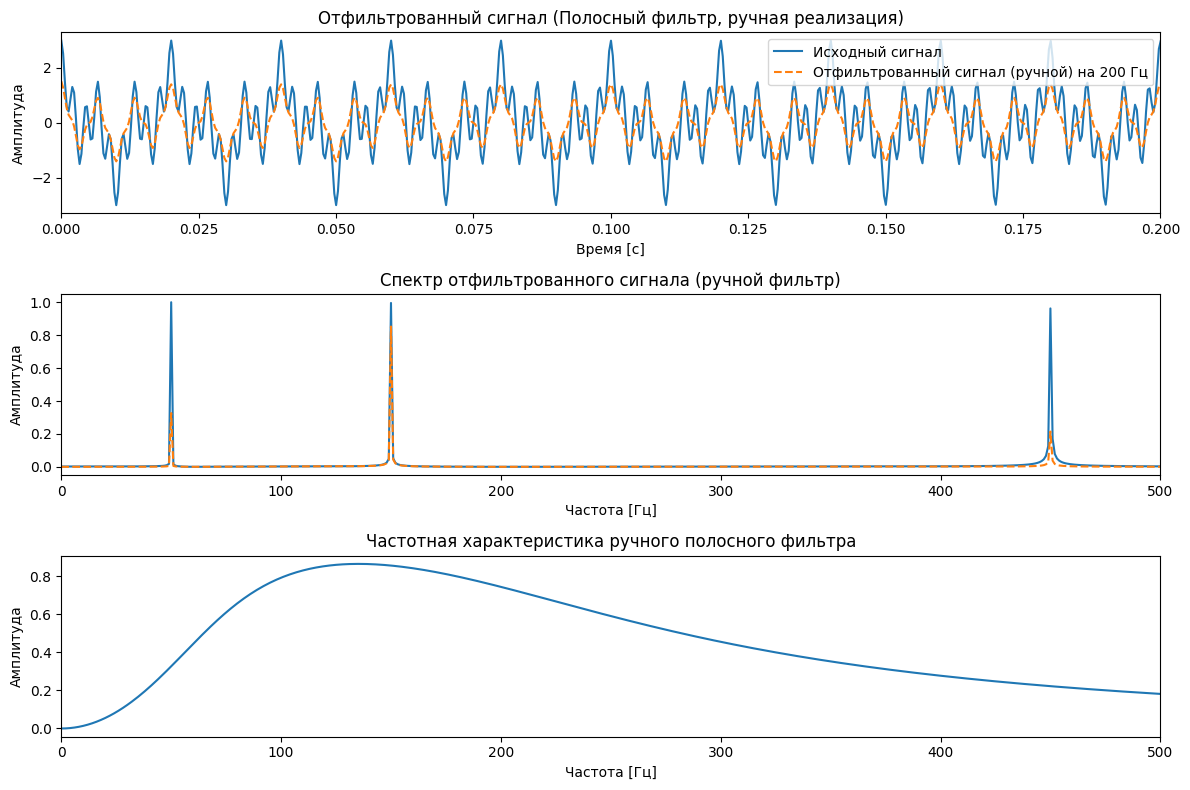

In [514]:
def bandpass_filter(signal, freq, cut_freq, order, delta):
    _, H_low = butterworth_filter_manual(signal, freq, cut_freq+delta, order)
    _, H_high = butterworth_filter_manual_high_freq(signal, freq, cut_freq-delta, order)
    H_f = np.abs(H_low)*np.abs(H_high)
    return np.fft.ifft(np.fft.fft(signal) * np.abs(H_f)).real, H_f

cut_freq = 150
delta = 65
signal2 = np.cos(2*np.pi*50*t) + np.cos(2*t*np.pi*150) + np.cos(2*np.pi*450*t)
filtered_signal_manual_bp, H_f = bandpass_filter(signal2, frequencies, cut_freq, order, delta)


# Построим графики фильтра и отфильтрованного сигнала
plt.figure(figsize=(12, 8))

# График отфильтрованного сигнала
plt.subplot(3, 1, 1)
plt.plot(t, signal2, label='Исходный сигнал')
#plt.plot(t, filtered_signal, label='Отфильтрованный сигнал', linestyle='-')
plt.plot(t, filtered_signal_manual_bp.real, label=f'Отфильтрованный сигнал (ручной) на {cutoff_freq} Гц', linestyle='--')
plt.xlim(0, 0.2)
plt.title('Отфильтрованный сигнал (Полосный фильтр, ручная реализация)')
plt.xlabel('Время [с]')
plt.ylabel('Амплитуда')
plt.legend()

# Спектр отфильтрованного сигнала
plt.subplot(3, 1, 2)
plt.plot(frequencies[:len(frequencies)//2], np.abs(np.fft.fft(signal2))[:len(frequencies)//2] * 2 / fs, label='Спектр')
plt.plot(frequencies[:len(frequencies)//2], np.abs(np.fft.fft(filtered_signal_manual_bp))[:len(frequencies)//2] * 2 / fs, label='Спектр после фильтра', linestyle='--')
plt.xlim(0, 500)
plt.title('Спектр отфильтрованного сигнала (ручной фильтр)')
plt.xlabel('Частота [Гц]')
plt.ylabel('Амплитуда')

# Частотная характеристика фильтра Баттерворта
plt.subplot(3, 1, 3)
plt.plot(frequencies[:len(frequencies)//2], np.abs(H_f[:len(frequencies)//2]))
plt.xlim(0, 500)
plt.title('Частотная характеристика ручного полосного фильтра')
plt.xlabel('Частота [Гц]')
plt.ylabel('Амплитуда')

plt.tight_layout()
plt.show()

5.2 задание

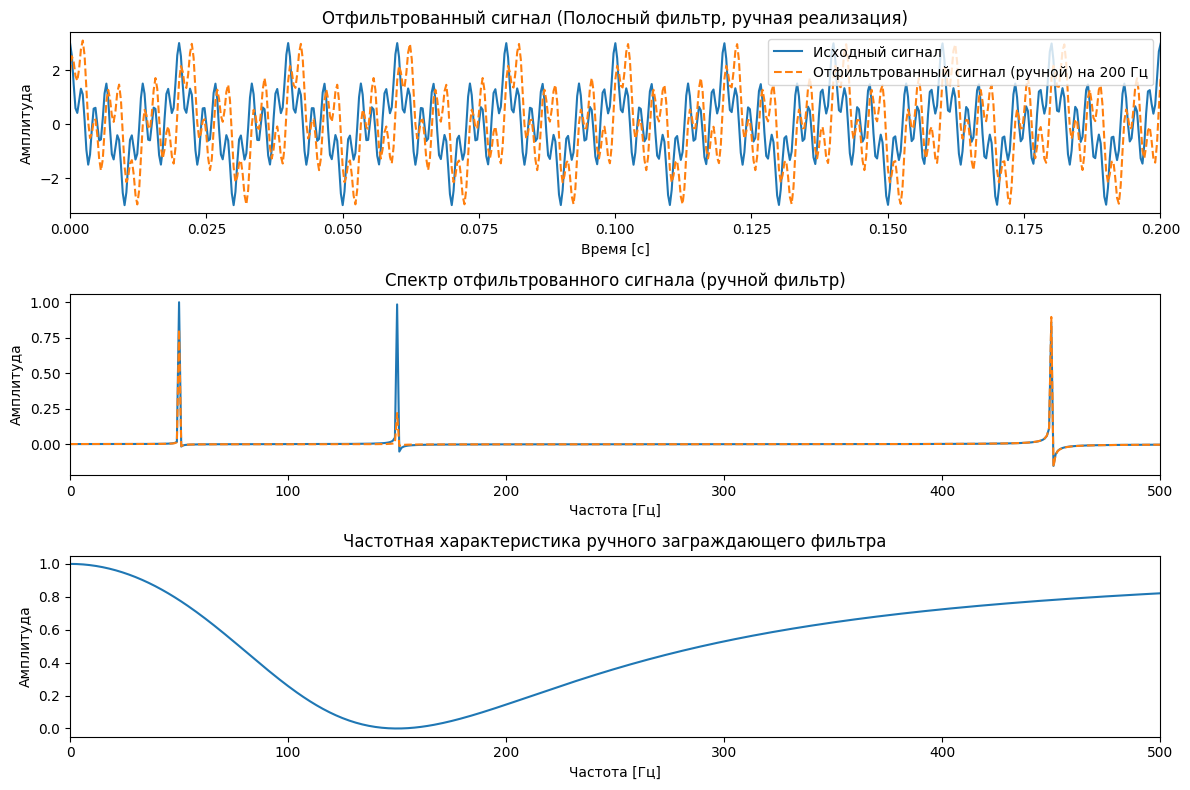

In [515]:
def H_w_wc_lpf(frequencies, cut_freq):
    omega = frequencies / cut_freq
    return 1 / (-omega**2 + 1j * np.sqrt(2) * omega + 1)

def H_w_wc_hpf(frequencies, cut_freq):
    omega =  cut_freq / (frequencies + 1e-7)
    return 1 / (-omega**2 + 1j * np.sqrt(2) * omega + 1)


def notch_filter(signal, freq, cut_freq):
    H_low = H_w_wc_lpf(freq, cut_freq) #butterworth_filter_manual(signal, freq, cut_freq, order)
    H_high = H_w_wc_hpf(freq, cut_freq) #butterworth_filter_manual_high_freq(signal, freq, cut_freq, order)
    H_f = H_low+H_high
    return np.fft.ifft(np.fft.fft(signal) * H_f).real, H_f

cut_freq = 150

signal2 = np.cos(2*np.pi*50*t) + np.cos(2*t*np.pi*150) + np.cos(2*np.pi*450*t)
filtered_signal_manual_bp, H_f = notch_filter(signal2, frequencies, cut_freq)


# Построим графики фильтра и отфильтрованного сигнала
plt.figure(figsize=(12, 8))

# График отфильтрованного сигнала
plt.subplot(3, 1, 1)
plt.plot(t, signal2, label='Исходный сигнал')
#plt.plot(t, filtered_signal, label='Отфильтрованный сигнал', linestyle='-')
plt.plot(t, filtered_signal_manual_bp, label=f'Отфильтрованный сигнал (ручной) на {cutoff_freq} Гц', linestyle='--')
plt.xlim(0, 0.2)
plt.title('Отфильтрованный сигнал (Полосный фильтр, ручная реализация)')
plt.xlabel('Время [с]')
plt.ylabel('Амплитуда')
plt.legend()

# Спектр отфильтрованного сигнала
plt.subplot(3, 1, 2)
plt.plot(frequencies[:len(frequencies)//2], np.fft.fft(signal2)[:len(frequencies)//2] * 2 / fs, label='Спектр')
plt.plot(frequencies[:len(frequencies)//2], np.fft.fft(filtered_signal_manual_bp)[:len(frequencies)//2] * 2 / fs, label='Спектр после фильтра', linestyle='--')
plt.xlim(0, 500)
plt.title('Спектр отфильтрованного сигнала (ручной фильтр)')
plt.xlabel('Частота [Гц]')
plt.ylabel('Амплитуда')

# Частотная характеристика фильтра Баттерворта
plt.subplot(3, 1, 3)
plt.plot(frequencies[:len(frequencies)//2], H_f[:len(frequencies)//2])
plt.xlim(0, 500)
plt.title('Частотная характеристика ручного заграждающего фильтра')
plt.xlabel('Частота [Гц]')
plt.ylabel('Амплитуда')

plt.tight_layout()
plt.show()

6 задание

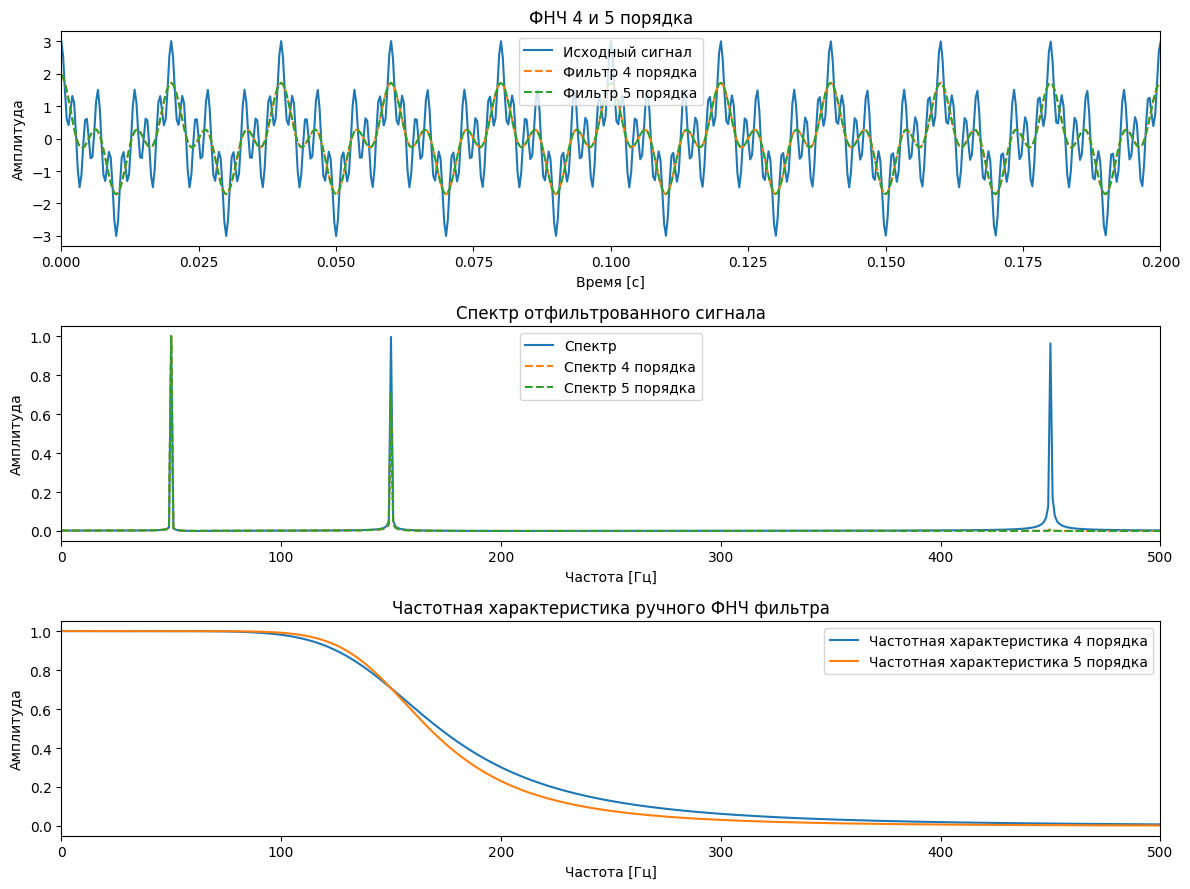

In [516]:

# Создание сигнала
signal3 = np.cos(2*np.pi*50*t) + np.cos(2*t*np.pi*150) + np.cos(2*np.pi*450*t)

# Функция для получения полюсов Баттерворта
def butterworth_poles(order):
    k = np.arange(1, order + 1)
    theta = (2 * k - 1) * np.pi / (2 * order)
    pol = -np.exp(1j * theta)
    return pol

# Функция для построения передаточной функции Баттерворта
def butterworth_transfer(signal, frequencies, cut_freq, order=2):
    pol = butterworth_poles(order)
    fft_signal = np.fft.fft(signal)
    S = frequencies / cut_freq
    H_f = np.ones_like(S, dtype=complex)
    for p in pol:
        H_f *= 1 / (S - p)
    return np.fft.ifft(fft_signal * np.abs(H_f)).real, H_f

# Частота среза
cutoff_freq = 150
H_fs = []
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.plot(t, signal3, label='Исходный сигнал')
plt.xlim(0, 0.2)
plt.title(f'ФНЧ 4 и 5 порядка')
plt.xlabel('Время [с]')
plt.ylabel('Амплитуда')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(frequencies[:len(frequencies)//2], np.abs(np.fft.fft(signal2))[:len(frequencies)//2] * 2 / fs, label='Спектр')
plt.xlim(0, 500)
plt.title('Спектр отфильтрованного сигнала')
plt.xlabel('Частота [Гц]')
plt.ylabel('Амплитуда')
plt.legend()
plt.subplot(3, 1, 3)
#plt.plot(frequencies[:len(frequencies)//2], np.abs(H_f[:len(frequencies)//2]))
plt.xlim(0, 500)
plt.title('Частотная характеристика ручного ФНЧ фильтра')
plt.xlabel('Частота [Гц]')
plt.ylabel('Амплитуда')


for order in [4, 5]:
    filtered_signal_order, H_f = butterworth_transfer(signal3, frequencies, cutoff_freq, order)

    plt.subplot(3, 1, 1)
    plt.plot(t, filtered_signal_order, label=f'Фильтр {order} порядка', linestyle='--')
    plt.legend()
    # Спектр отфильтрованного сигнала
    plt.subplot(3, 1, 2)

    plt.plot(frequencies[:len(frequencies)//2], np.abs(np.fft.fft(filtered_signal_order))[:len(frequencies)//2] * 2 / fs, label=f'Спектр {order} порядка', linestyle='--')
    plt.legend()
    plt.subplot(3, 1, 3)
    plt.plot(frequencies[:len(frequencies)//2], np.abs(H_f[:len(frequencies)//2]), label=f'Частотная характеристика {order} порядка')
    plt.legend()


plt.tight_layout()
plt.show()

7 задание

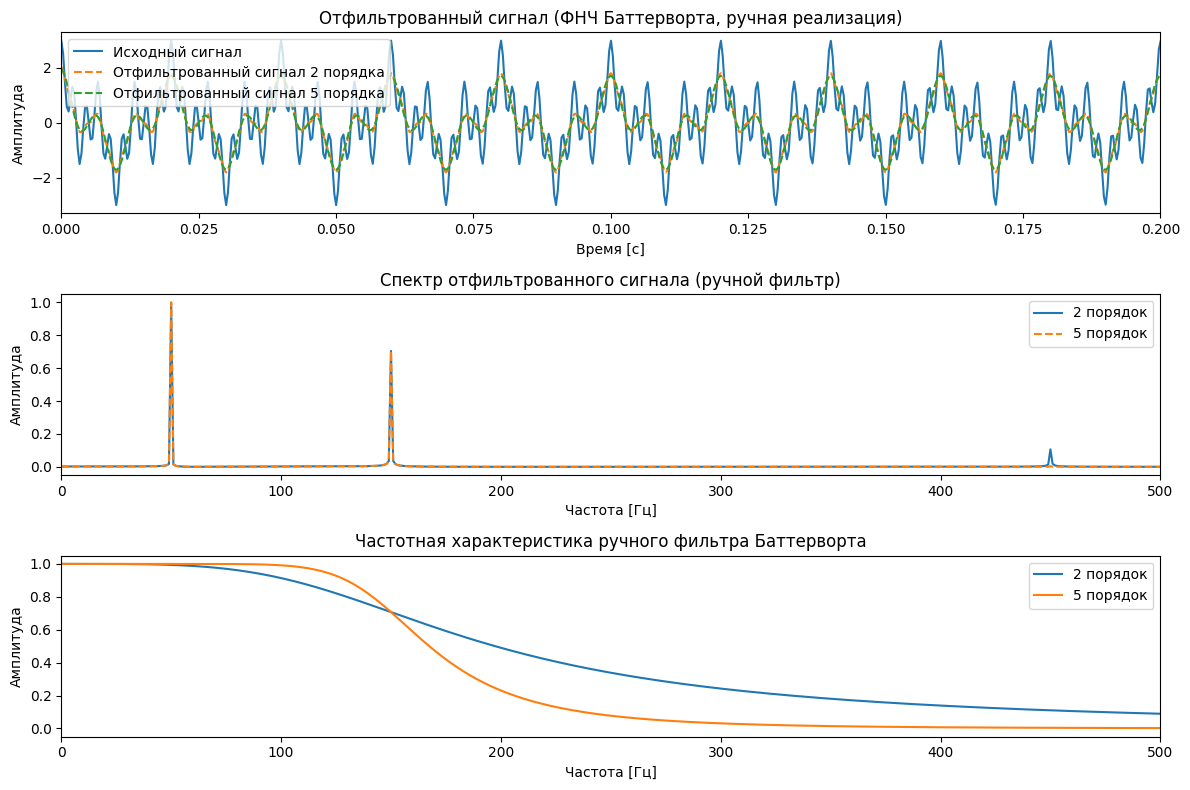

In [517]:
# Применим фильтр к спектру сигнала
cutoff_freq = 150  # Частота среза в Гц
order = 2  # Порядок фильтра

# Применяем ручной фильтр к спектру
 
filtered_signal_manual, H_F = butterworth_filter_manual(signal, frequencies, cutoff_freq, order)


# Построим графики фильтра и отфильтрованного сигнала
plt.figure(figsize=(12, 8))

# График отфильтрованного сигнала
plt.subplot(3, 1, 1)
plt.plot(t, signal, label='Исходный сигнал')
plt.plot(t, filtered_signal_manual, label=f'Отфильтрованный сигнал 2 порядка', linestyle='--')
plt.plot(t, filtered_signal_order, label=f'Отфильтрованный сигнал 5 порядка', linestyle='--')
plt.xlim(0, 0.2)
plt.title('Отфильтрованный сигнал (ФНЧ Баттерворта, ручная реализация)')
plt.xlabel('Время [с]')
plt.ylabel('Амплитуда')
plt.legend()

# Спектр отфильтрованного сигнала
plt.subplot(3, 1, 2)
plt.plot(frequencies[:len(frequencies)//2], np.abs(np.fft.fft(filtered_signal_manual))[:len(frequencies)//2] * 2 / fs, label="2 порядок")
plt.plot(frequencies[:len(frequencies)//2], np.abs(np.fft.fft(filtered_signal_order))[:len(frequencies)//2] * 2 / fs, label=f'5 порядок', linestyle='--')
plt.xlim(0, 500)
plt.title('Спектр отфильтрованного сигнала (ручной фильтр)')
plt.xlabel('Частота [Гц]')
plt.ylabel('Амплитуда')
plt.legend()

# Частотная характеристика фильтра Баттерворта
plt.subplot(3, 1, 3)
# plt.plot(frequencies[:len(frequencies)//2], H_f[:len(frequencies)//2])
plt.plot(np.abs(H_F), label='2 порядок')
plt.plot(np.abs(H_f), label='5 порядок')
#plt.plot(w, np.abs(h), label='scipy')
plt.xlim(0, 500)
plt.title('Частотная характеристика ручного фильтра Баттерворта')
plt.xlabel('Частота [Гц]')
plt.ylabel('Амплитуда')
plt.legend()
plt.tight_layout()
plt.show()

8 + 9 задание

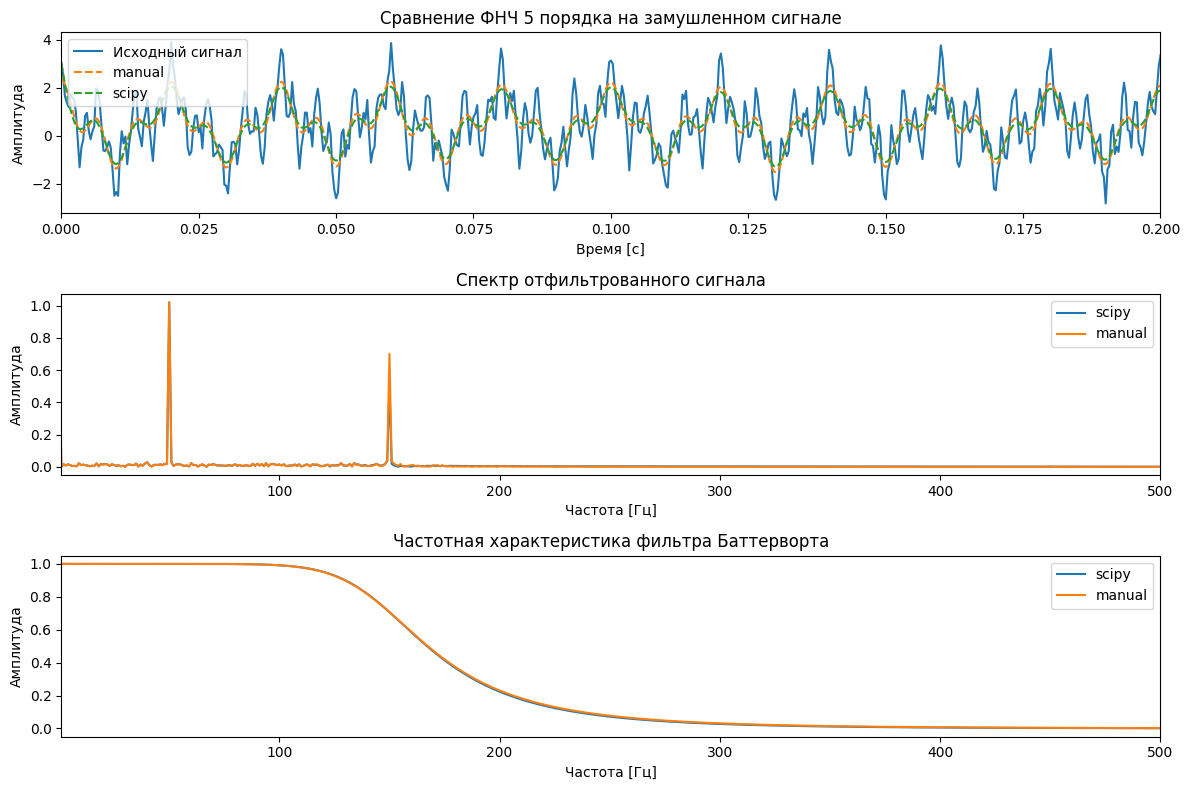

In [518]:
noise_amp = 1
noises = np.random.random(len(t)) * noise_amp


cutoff_freq = 150  # Частота среза в Гц
order = 5  # Порядок фильтра
nyquist = 0.5 * fs  # Частота Найквиста
normal_cutoff = cutoff_freq / nyquist

# Получаем коэффициенты фильтра
b, a = butter(order, normal_cutoff)

signal3 = np.cos(2*np.pi*50*t) + np.cos(2*t*np.pi*150) + np.cos(2*np.pi*450*t)
# Применяем фильтр к сигналу
signal3 = signal3 + noises
filtered_signal = filtfilt(b, a, signal3)
filtered_signal_order, H_f = butterworth_transfer(signal3, frequencies, cutoff_freq, order)

# Частотная характеристика фильтра
w, h = freqz(b, a, fs=fs)

# Построим графики фильтра и отфильтрованного сигнала
plt.figure(figsize=(12, 8))

# График исходного и отфильтрованного сигнала
plt.subplot(3, 1, 1)
plt.plot(t, signal3, label='Исходный сигнал')
plt.plot(t, filtered_signal_order, label='manual', linestyle='--')
plt.plot(t, filtered_signal, label='scipy', linestyle='--')
plt.xlim(0, 0.2)
plt.title('Сравнение ФНЧ 5 порядка на замушленном сигнале')
plt.xlabel('Время [с]')
plt.ylabel('Амплитуда')
plt.legend()

# Спектр отфильтрованного сигнала
plt.subplot(3, 1, 2)
plt.plot(frequencies[:len(frequencies)//2], np.abs(np.fft.fft(filtered_signal))[:len(frequencies)//2] * 2 / fs, label='scipy')
plt.plot(frequencies[:len(frequencies)//2], np.abs(np.fft.fft(filtered_signal_order))[:len(frequencies)//2] * 2 / fs, label='manual')
plt.xlim(1, 500)
plt.title('Спектр отфильтрованного сигнала')
plt.xlabel('Частота [Гц]')
plt.ylabel('Амплитуда')
plt.legend()

# Частотная характеристика фильтра Баттерворта
plt.subplot(3, 1, 3)
plt.plot(np.abs(w), np.abs(h), label='scipy')
plt.plot(np.abs(H_f), label='manual')
plt.xlim(1, 500)
plt.title('Частотная характеристика фильтра Баттерворта')
plt.xlabel('Частота [Гц]')
plt.ylabel('Амплитуда')
plt.legend()
plt.tight_layout()
plt.show()


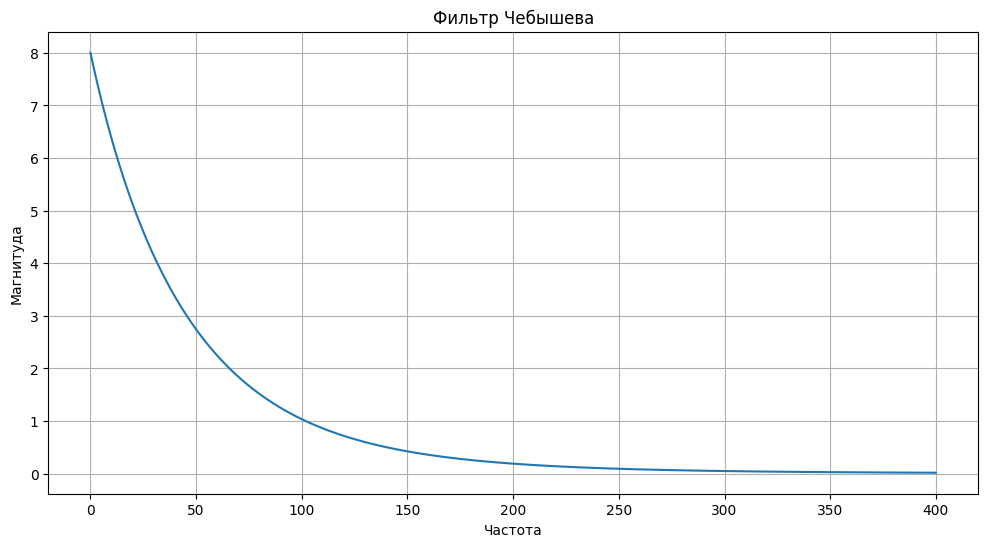

In [519]:
import numpy as np
import matplotlib.pyplot as plt

def chebyshev_pol(order, eps):
    k = np.arange(1, order + 1)
    beta = (1 / order) * np.arcsinh(1 / eps)
    theta = (2 * k - 1) * np.pi / (2 * order)
    pol = -np.sinh(beta) * np.sin(theta) + 1j * np.cosh(beta) * np.cos(theta)
    return pol

# Передаточная функция для ФНЧ Чебышева 1-го рода
def chebyshev_transfer_function(frequencies, wc, order, eps):
    pol = chebyshev_pol(order, eps)
    S = frequencies / wc
    H = np.ones_like(S, dtype=complex)
    for p in pol:
        H *= 1 / (S - p)
    return H

# Параметры фильтра
order = 5
wc = 200
epsilon = 0.5

# Частоты для анализа
frequencies = np.linspace(0, 2 * wc, 1000)  # Частоты от 0 до 2 * wc

# Построение передаточной функции
H_w_chebyshev = chebyshev_transfer_function(frequencies, wc, order, epsilon)

# Вычисление амплитуды частотной характеристики
mag = np.abs(H_w_chebyshev)

# Визуализация частотной характеристики
plt.figure(figsize=(12, 6))
plt.plot(frequencies, mag)  # Логарифмическое масштабирование для удобства
plt.title('Фильтр Чебышева')
plt.xlabel('Частота')
plt.ylabel('Магнитуда')
plt.grid(True)
plt.show()